# Insurance claim - Farud detection

## Data description

Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

## Importing modules

In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Read csv file

In [42]:
df = pd.read_csv('fraud_detection.csv')
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [44]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


## EDA

### Checking for null values

<AxesSubplot:>

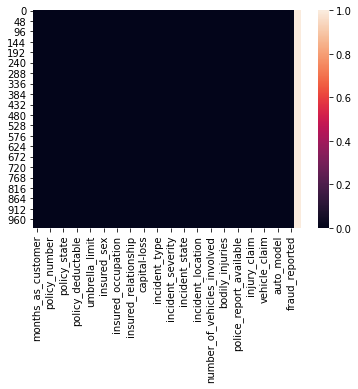

In [5]:
sns.heatmap(df.isnull())

In [115]:
# From the above heatmap it is clear that no null values are present.
# But sometimes the null values are present with the character like '?'.
df = df.replace('?', np.nan)
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

* we can conclude the total number of null values present in a column.

### Treating null values

In [45]:
# The column _c39 contains all null values

df.drop('_c39', axis=1, inplace=True)

In [46]:
# let's check the column collision_type as it contains 178 null values.
# collison type column contain 3 unique values namely Rear collision, side collision, front collision
# we will replace the null value with most common collision type
df['collision_type'].fillna(df['collision_type'].mode()[0], inplace=True)

In [47]:
# lets check for property_damage column as it contains 360 null values.
# property damage column contains only 2 values YES or NO.
# we can replace the null values with NO, assuming no property damage.
df['property_damage'].fillna('NO', inplace=True)

In [48]:
# lets check for the column police report available as it contaains 343 values.
# police_report_available contains only 2 values YES or NO.
# we can replace the null values with NO, assuming there is NO police_report_available.
df['police_report_available'].fillna('NO', inplace=True)

In [49]:
df.isnull().any().any()

False

## EDA

<AxesSubplot:xlabel='policy_state', ylabel='count'>

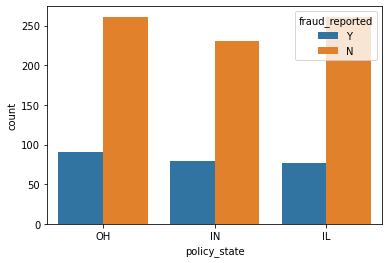

In [12]:
sns.countplot(df['policy_state'], hue=df['fraud_reported'])

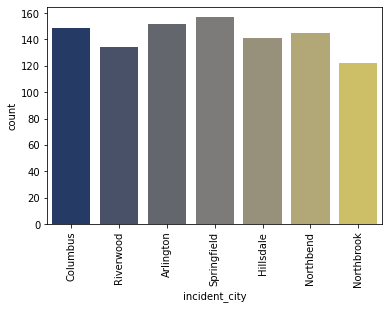

In [74]:
sns.countplot(df['incident_city'], palette='cividis')
plt.xticks(rotation=90)
plt.show()

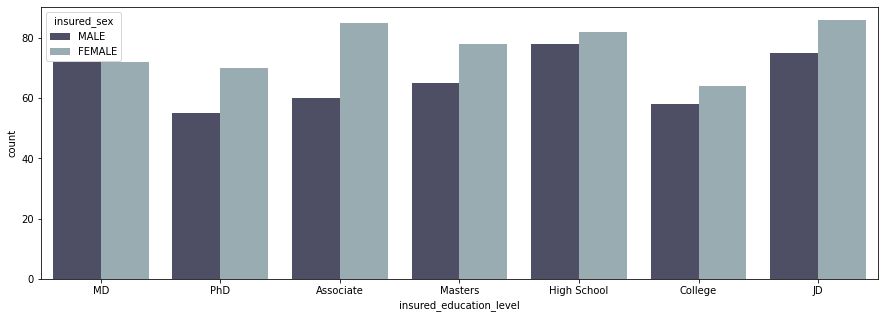

In [73]:
plt.figure(figsize=(15,5))
sns.countplot(df['insured_education_level'], hue=df['insured_sex'], palette='bone')
plt.show()

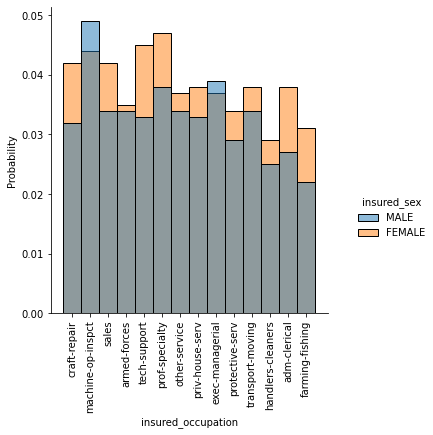

In [30]:
sns.displot(df, x="insured_occupation", hue="insured_sex", stat="probability")
plt.xticks(rotation=90)
plt.show()

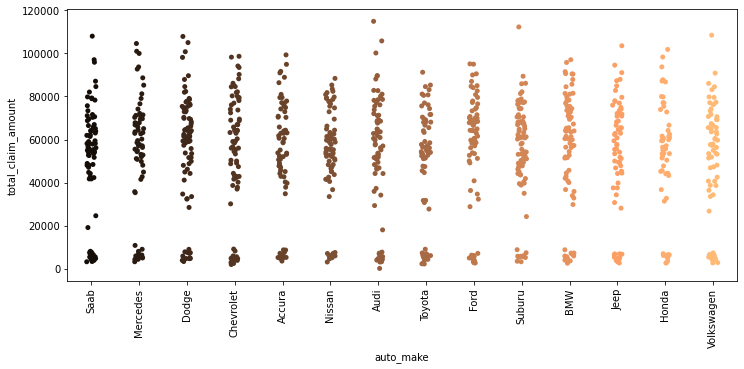

In [49]:
plt.figure(figsize=(12,5))
sns.stripplot(df['auto_make'], df['total_claim_amount'], palette='copper')
plt.xticks(rotation=90)
plt.show()

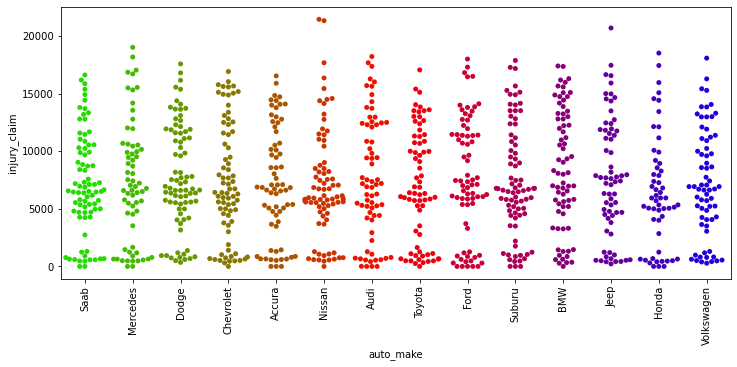

In [71]:
plt.figure(figsize=(12,5))
sns.swarmplot(df['auto_make'], df['injury_claim'], palette='brg_r')
plt.xticks(rotation=90)
plt.show()

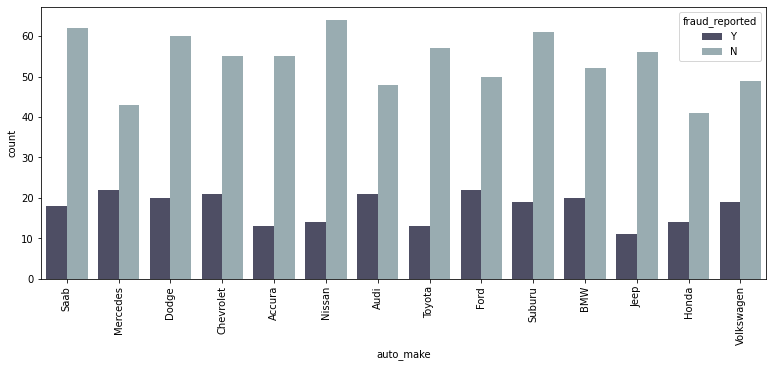

In [72]:
plt.figure(figsize=(13,5))
sns.countplot(df['auto_make'], hue=df['fraud_reported'], palette='bone')
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='incident_state', ylabel='total_claim_amount'>

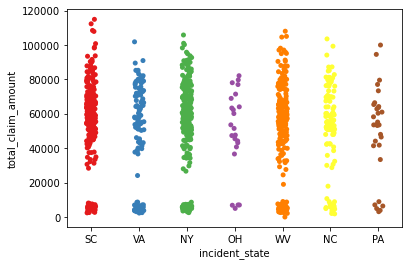

In [69]:
sns.stripplot(x=df['incident_state'], y=df['total_claim_amount'], palette='Set1')

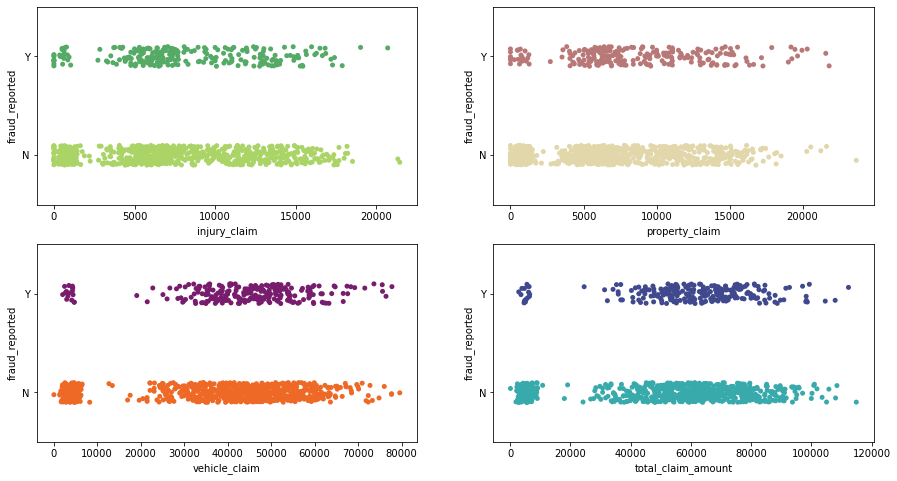

In [83]:
fig, ax = plt.subplots(2,2, figsize=(15,8))
sns.stripplot(df['injury_claim'], df['fraud_reported'], palette='summer', ax=ax[0,0])
sns.stripplot(df['property_claim'], df['fraud_reported'], palette='pink', ax=ax[0,1])
sns.stripplot(df['vehicle_claim'], df['fraud_reported'], palette='inferno', ax=ax[1,0])
sns.stripplot(df['total_claim_amount'], df['fraud_reported'], palette='mako', ax=ax[1,1])
plt.show()

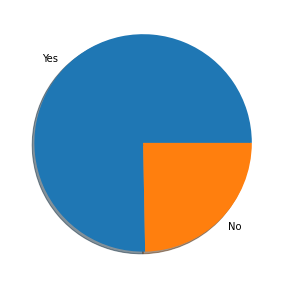

In [102]:
plt.figure(figsize=(10,5))
plt.pie(df['fraud_reported'].value_counts(), labels=['Yes', 'No'], shadow=True)
plt.show()

### Data Processing 

In [50]:
# let's extrat days, month and year from policy bind date

df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'], errors = 'coerce')

In [51]:
# let's encode the fraud report to numerical values

df['fraud_reported'] = df['fraud_reported'].replace({'Y':1, 'N':0})

In [54]:
# let's perform target encoding for auto make

from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df['auto_model'] = LE.fit_transform(df['auto_model'])

In [58]:
# let's perform target encoding for auto make

df['auto_make'] = LE.fit_transform(df['auto_make'])

In [59]:
# let's perform target encoding for property damage

df['police_report_available'] = LE.fit_transform(df['police_report_available'])

In [60]:
# let's perform target encoding for property damage

df['property_damage'] = LE.fit_transform(df['property_damage'])

In [61]:
# let's do target encoding for incident city

df['incident_city'] = LE.fit_transform(df['incident_city'])

In [62]:
# let's perform target encoding for incident state

df['incident_state'] = LE.fit_transform(df['incident_state'])

In [63]:
# let's perform target encoding for authorities contacted

df['authorities_contacted'] = LE.fit_transform(df['authorities_contacted'])

In [64]:
# let's perform target encoding for incident severity

df['incident_severity'] = LE.fit_transform(df['incident_severity'])

In [65]:
# let's perform target encoding for collision type

df['collision_type'] = LE.fit_transform(df['collision_type'])

In [66]:
# let's perform target encoing for incident type

df['incident_type'] = LE.fit_transform(df['incident_type'])

In [67]:
df['incident_date'] = pd.to_datetime(df['incident_date'], errors = 'coerce')

# extracting days and month from date
df['incident_month'] = df['incident_date'].dt.month
df['incident_day'] = df['incident_date'].dt.day

In [68]:
# let's do target encoding for insured relationship

df['insured_relationship'] = LE.fit_transform(df['insured_relationship'])

In [69]:
# let's perform target encoding for insured_hobbies

df['insured_hobbies'] = LE.fit_transform(df['insured_hobbies'])

In [70]:
# let's perform target encoding for insured_occupation

df['insured_occupation'] = LE.fit_transform(df['insured_occupation'])

In [71]:
# let's perform target encoding for insured_education_level

df['insured_education_level'] = LE.fit_transform(df['insured_education_level'])

In [72]:
# target encoding for sex

df['insured_sex'] = LE.fit_transform(df['insured_sex'])

In [73]:
# target encoding for policy_csl

df['policy_csl'] = LE.fit_transform(df['policy_csl'])

In [87]:
# target encoding for policy_state

df['policy_state'] = LE.fit_transform(df['policy_state'])

In [74]:
# let's delete unnecassary columns

df = df.drop(['policy_number','policy_bind_date', 'incident_date','incident_location'], axis=1)

### Checking correlation

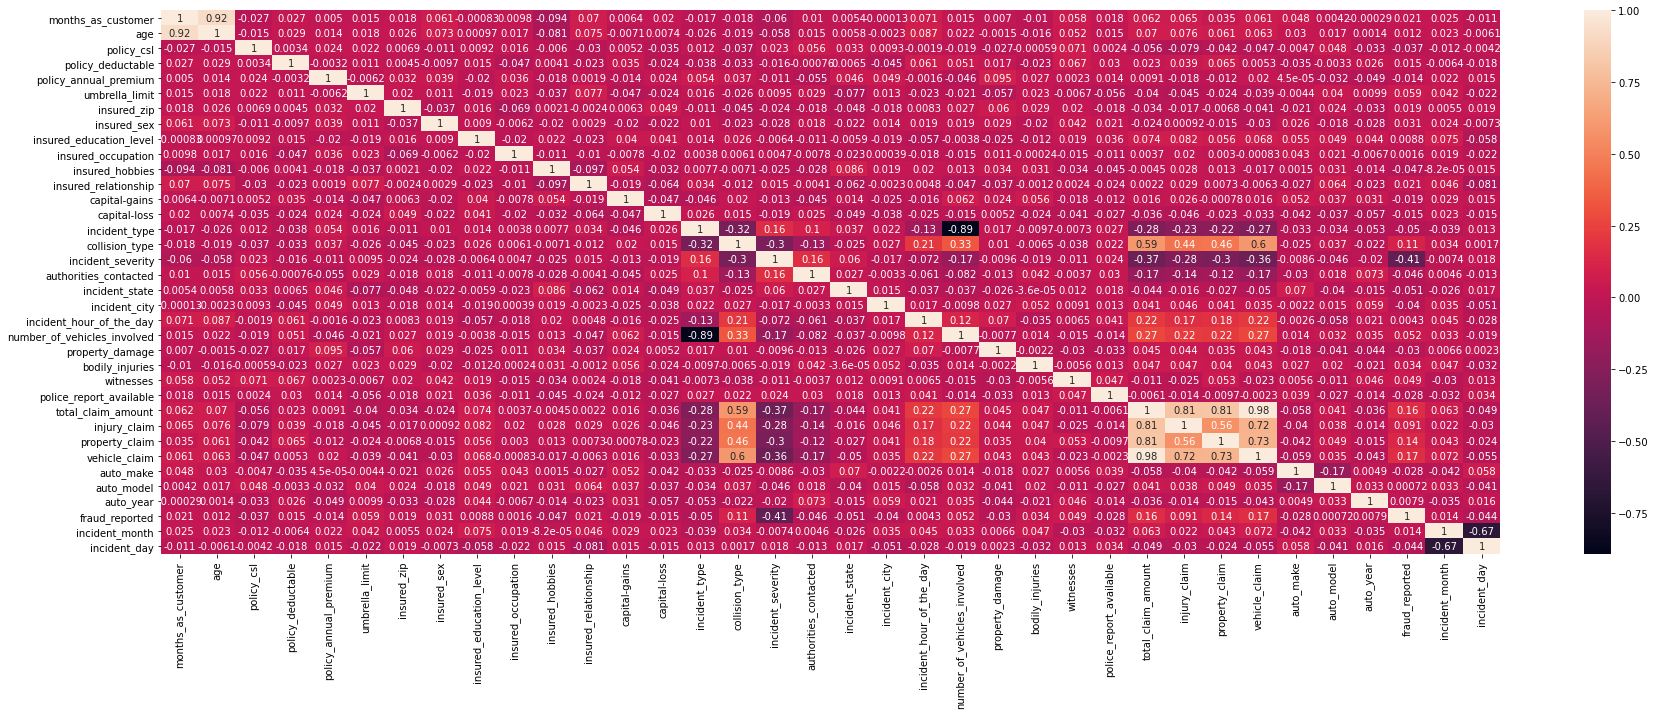

In [75]:
# using correlation heatmp

plt.figure(figsize=(30,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [76]:
corr_matrix = df.corr()
corr_matrix['fraud_reported'].sort_values(ascending=False)

fraud_reported                 1.000000
vehicle_claim                  0.170049
total_claim_amount             0.163651
property_claim                 0.137835
collision_type                 0.110130
injury_claim                   0.090975
umbrella_limit                 0.058622
number_of_vehicles_involved    0.051839
witnesses                      0.049497
bodily_injuries                0.033877
insured_sex                    0.030873
insured_relationship           0.021043
months_as_customer             0.020544
insured_zip                    0.019368
policy_deductable              0.014817
incident_month                 0.014495
age                            0.012143
insured_education_level        0.008808
auto_year                      0.007928
incident_hour_of_the_day       0.004316
insured_occupation             0.001564
auto_model                     0.000720
policy_annual_premium         -0.014480
capital-loss                  -0.014863
capital-gains                 -0.019173


### Checking skewness

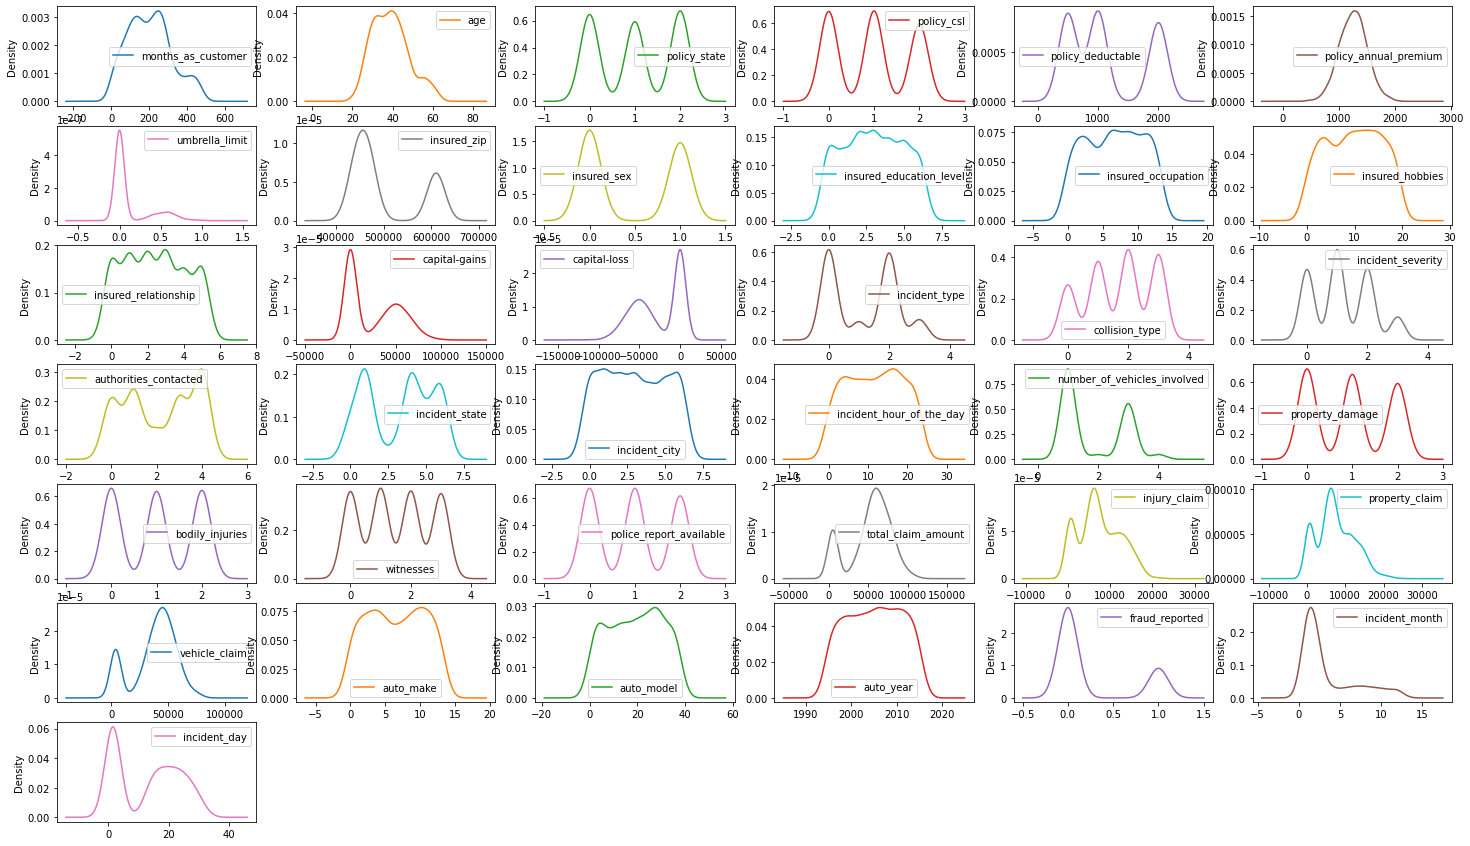

In [116]:
df.plot(kind='density', subplots=True, layout=(7,6), sharex=False, legend=True, figsize=(25,15))
plt.show()

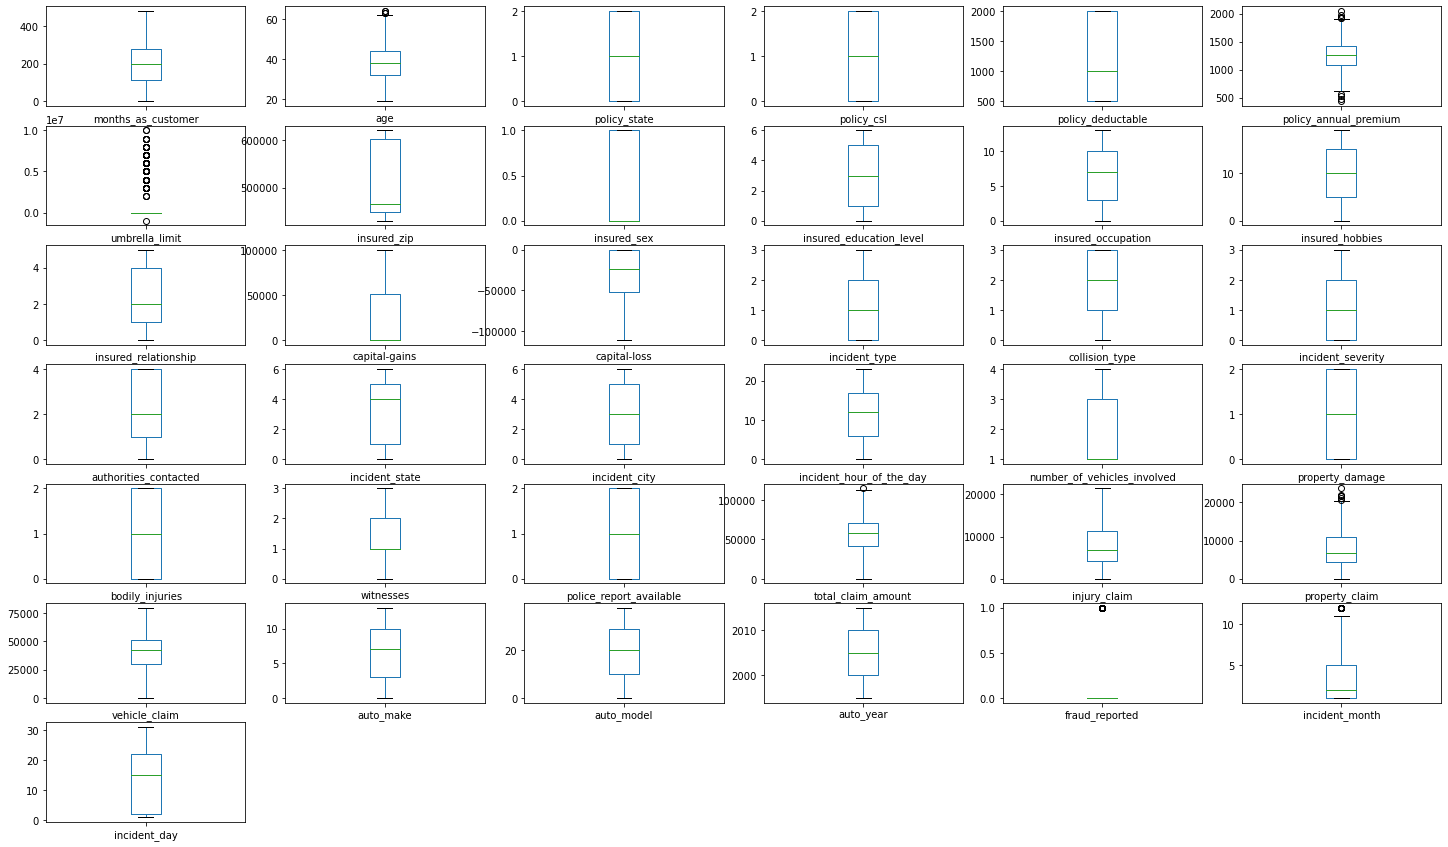

In [118]:
df.plot(kind='box', subplots=True, layout=(7,6), sharex=False, legend=True, figsize=(25,15))
plt.show()

### Checking if our data is balanced or not

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

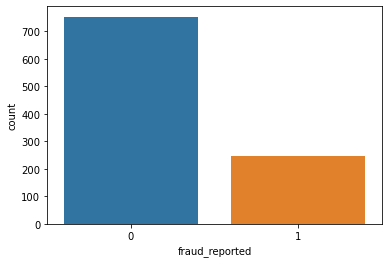

In [119]:
sns.countplot(df['fraud_reported'])

In [120]:
x = df.drop('fraud_reported', axis=1)
y = df['fraud_reported']

In [121]:
# using SMOTE algorith to balance our data

from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(x, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({0: 753, 1: 247})
Resample dataset shape Counter({1: 753, 0: 753})


### Model development

In [124]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [125]:
maxAccu = 0
maxRS = 0

for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.33, random_state=i)
    lg = LogisticRegression()
    lg.fit(x_train, y_train)
    pred = lg.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i
print("Best accuracy is: ",maxAccu,"on Random State: ",maxRS)

Best accuracy is:  0.6378269617706237 on Random State:  172


In [126]:
# creating train test split

x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.3, random_state=115)

In [158]:
# By using Logistic Regression

lr = LogisticRegression()
lr.fit(x_train, y_train)
predlr = lr.predict(x_test)
print("Accuracy Score: {}".format(accuracy_score(y_test, predlr)*100))
print("f1_Score: {}".format(f1_score(y_test, predlr)*100))
print(confusion_matrix(y_test, predlr))
print(classification_report(y_test, predlr))

Accuracy Score: 55.530973451327434
f1_Score: 57.861635220125784
[[113 105]
 [ 96 138]]
              precision    recall  f1-score   support

           0       0.54      0.52      0.53       218
           1       0.57      0.59      0.58       234

    accuracy                           0.56       452
   macro avg       0.55      0.55      0.55       452
weighted avg       0.55      0.56      0.55       452



In [159]:
# By using Naive Bayes

gnb = GaussianNB()
gnb.fit(x_train, y_train)
predgnb = gnb.predict(x_test)
print("Accuracy Score: {}".format(accuracy_score(y_test, predgnb)*100))
print("f1_Score: {}".format(f1_score(y_test, predgnb)*100))
print(confusion_matrix(y_test, predgnb))
print(classification_report(y_test, predgnb))

Accuracy Score: 59.95575221238938
f1_Score: 67.7361853832442
[[ 81 137]
 [ 44 190]]
              precision    recall  f1-score   support

           0       0.65      0.37      0.47       218
           1       0.58      0.81      0.68       234

    accuracy                           0.60       452
   macro avg       0.61      0.59      0.57       452
weighted avg       0.61      0.60      0.58       452



In [160]:
# By using Decision Tree

dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
preddtc = dtc.predict(x_test)
print("Accuracy Score: {}".format(accuracy_score(y_test, preddtc)*100))
print("f1_Score: {}".format(f1_score(y_test, preddtc)*100))
print(confusion_matrix(y_test, preddtc))
print(classification_report(y_test, preddtc))

Accuracy Score: 83.1858407079646
f1_Score: 83.54978354978357
[[183  35]
 [ 41 193]]
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       218
           1       0.85      0.82      0.84       234

    accuracy                           0.83       452
   macro avg       0.83      0.83      0.83       452
weighted avg       0.83      0.83      0.83       452



In [161]:
# By using Random Forest

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
predrfc = rfc.predict(x_test)
print("Accuracy Score: {}".format(accuracy_score(y_test, predrfc)*100))
print("f1_Score: {}".format(f1_score(y_test, predrfc)*100))
print(confusion_matrix(y_test, predrfc))
print(classification_report(y_test, predrfc))

Accuracy Score: 84.95575221238938
f1_Score: 84.54545454545455
[[198  20]
 [ 48 186]]
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       218
           1       0.90      0.79      0.85       234

    accuracy                           0.85       452
   macro avg       0.85      0.85      0.85       452
weighted avg       0.86      0.85      0.85       452



In [162]:
# By using K nearest neughbors

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
predknn = knn.predict(x_test)
print("Accuracy Score: {}".format(accuracy_score(y_test, predknn)*100))
print("f1_Score: {}".format(f1_score(y_test, predknn)*100))
print(confusion_matrix(y_test, predknn))
print(classification_report(y_test, predknn))

Accuracy Score: 67.03539823008849
f1_Score: 71.17988394584138
[[119  99]
 [ 50 184]]
              precision    recall  f1-score   support

           0       0.70      0.55      0.61       218
           1       0.65      0.79      0.71       234

    accuracy                           0.67       452
   macro avg       0.68      0.67      0.66       452
weighted avg       0.68      0.67      0.67       452



### Checking cross validation score

In [163]:
# checking cross validation score

models = []
models.append(('Logistic Regression', LogisticRegression()))
models.append(('Naive Bayes', GaussianNB()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))

maxx_acc = 0
for name, model in models:
    kfold = KFold(n_splits=10)
    cv = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    result = cv.mean()
    print('{}: {:.2f}'.format(name, result*100))
    if result > maxx_acc:
        maxx_acc = result
        b_model = name
print("The best model is {} with the accuracy {:.2f}".format(b_model, maxx_acc*100))    

Logistic Regression: 55.40
Naive Bayes: 58.44
Decision Tree: 78.66
Random Forest: 86.05
KNN: 66.70
The best model is Random Forest with the accuracy 86.05


* It is clearly seen that Random forest delievers a good accuracy from all these models.

### Hyperparameter tuning

In [136]:
# creating parameter list to pass in Grid Search CV

parameter = {'n_estimators': np.arange(50, 200, 10),
            'criterion': ['gini', 'entropy'],
            'max_depth': np.arange(2,8)}

In [137]:
GCV = GridSearchCV(RandomForestClassifier(), parameter, cv=kfold)
GCV.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7]),
                         'n_estimators': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150, 160, 170,
       180, 190])})

In [138]:
# Now we will find the best parameters

GCV.best_params_

{'criterion': 'entropy', 'max_depth': 7, 'n_estimators': 180}

In [141]:
mod = RandomForestClassifier(criterion='gini', max_depth=7, n_estimators=180)
mod.fit(x_train, y_train)
prediction = mod.predict(x_test)
print("Accuracy Score: {:.2f}".format(accuracy_score(y_test, prediction)*100))

Accuracy Score: 84.29


### Checking how much our predictions are correct

In [164]:
predictions = pd.DataFrame({'predictions': prediction, 'Real Values': y_test})
predictions

,predictions,Real Values
1142,0,1
534,0,0
703,0,1
1439,1,1
1034,1,1
...,...,...
794,0,0
1225,1,1
1348,1,1
671,0,0


### Plotting ROC AUC curve

In [165]:
# predicting probabilities
pred_prob1 = gnb.predict_proba(x_test)
pred_prob2 = dtc.predict_proba(x_test)
pred_prob3 = knn.predict_proba(x_test)
pred_prob4 = rfc.predict_proba(x_test)
pred_prob5 = lr.predict_proba(x_test)

In [166]:
from sklearn.metrics import roc_curve

# roc curve for model
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob5[:,1], pos_label=1)

# roc curve for tpr=fpr
random_prob = [0 for i in range(len(y_test))]
fpr, tpr, _ = roc_curve(y_test, random_prob, pos_label=1)

In [167]:
from sklearn.metrics import roc_auc_score

# auc score
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])
auc_score4 = roc_auc_score(y_test, pred_prob4[:,1])
auc_score5 = roc_auc_score(y_test, pred_prob5[:,1])
print('auc_score for GaussianNB: {:.2f}'.format(auc_score1*100))
print('auc_score for Decision Tree: {:.2f}'.format(auc_score2*100))
print('auc_score for K Nearest Neighbors: {:.2f}'.format(auc_score3*100))
print('auc_score for Random Forest: {:.2f}'.format(auc_score4*100))
print('auc_score for Logistic Regression: {:.2f}'.format(auc_score5*100))

auc_score for GaussianNB: 64.06
auc_score for Decision Tree: 83.21
auc_score for K Nearest Neighbors: 73.57
auc_score for Random Forest: 94.31
auc_score for Logistic Regression: 58.22


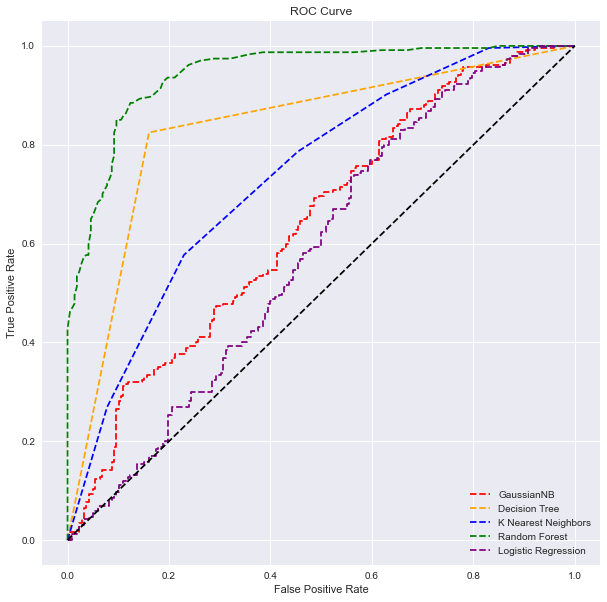

In [172]:
plt.style.use('seaborn')
plt.figure(figsize=(10,10))

# plot roc curve
plt.plot(fpr1, tpr1, linestyle='--', color='red', label='GaussianNB')
plt.plot(fpr2, tpr2, linestyle='--', color='orange', label='Decision Tree')
plt.plot(fpr3, tpr3, linestyle='--', color='blue', label='K Nearest Neighbors')
plt.plot(fpr4, tpr4, linestyle='--', color='green', label='Random Forest')
plt.plot(fpr5, tpr5, linestyle='--', color='purple', label='Logistic Regression')
plt.plot(fpr, tpr, linestyle='--', color='black')

#title
plt.title('ROC Curve')

# x label
plt.xlabel('False Positive Rate')

# y label
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()

### Saving model

In [173]:
import joblib
joblib.dump(mod, 'insurance.pkl')

['insurance.pkl']

### Loading the saved model

In [175]:
model = joblib.load('insurance.pkl')
pred = model.predict(x_test)
print(accuracy_score(y_test, prediction)*100)

84.2920353982301
